In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel('Data Entry 1.xlsx')

In [3]:
data


ID  Hemoglobin   WBC    WBC T  Neutrophils  Lymphocytes     PLT   PLT T  \
0      1         7.3  10.0  10000.0         50.1          43.2  189.0  189000   
1      2         7.3  10.0  10000.0         52.3          42.4  180.0  180000   
2      3         9.0   7.2   7200.0         60.7          30.7  148.0  148000   
3      4         3.8   6.0   6000.0         63.5          30.2  143.0  143000   
4      5         0.4   4.2   4200.0         53.7          39.1  236.0  236000   
..   ...         ...   ...      ...          ...           ...    ...     ...   
495  496        13.2   2.7   2700.0         49.5          43.4  169.0  169000   
496  497        11.6   6.2   6200.0         57.6          35.0  177.0  177000   
497  498         9.9   8.4   8400.0         63.5          29.2  133.1  133100   
498  499         7.4   7.4   7400.0         72.5          19.0  125.0  125000   
499  500        10.3  12.9  12900.0         75.4          15.5  244.0  244000   

      MPV   PCT   PDW   RBC    HCT   MCV   MCH  MCHC  RDWCV  RDWSD   PLCR  \
0     9.2  0.17  12.5  2.77   24.2  87.7  26.3  30.1   11.4   35.3  22.30   
1     8.9  0.16  12.5  2.84   25.0  88.2  25.7  20.2   11.4   35.3  19.50   
2    10.1  0.14  14.3  3.97   30.5  77.0  22.6  29.5   13.7   37.2  30.50   
3     8.6  0.12  11.3  4.22   32.8  77.9  23.2  29.8   17.0   46.5  16.40   
4    19.5  0.22  12.8  3.93  316.0  80.6  23.9  29.7   15.1   42.7  24.80   
..    ...   ...   ...   ...    ...   ...   ...   ...    ...    ...    ...   
495  10.1  0.17  14.3  4.77   41.2  86.4  27.4  31.7   12.2   37.2  28.60   
496   9.9  0.18  13.6  4.82   37.0  76.7  24.0  31.4   13.8   37.2  29.00   
497   9.6  0.12  12.8  4.40   30.3  68.8  22.7  33.0   10.6   38.0  24.60   
498  10.7  0.13  15.9  3.34   23.6  70.6  21.9  30.9   11.0   36.2  33.60   
499   9.7  0.23  13.8  4.27   31.0  72.0  24.4  33.5   12.3   40.7  26.14   

     Target  
0         1  
1         1  
2         0  
3         0  
4         1  
..      ...  
495       1  
496       1  
497       0  
498       0  
499       1  

[500 rows x 20 columns]

In [4]:
data= data.drop(columns=['PLT','WBC'])

In [5]:
data= data.drop("ID",axis=1)

In [6]:
data.sample(10)

Hemoglobin    WBC T  Neutrophils  Lymphocytes    PLT T   MPV   PCT   PDW  \
222         9.8   5200.0         53.3          39.0  207000   9.3  0.19  12.8   
477         8.8   4600.0         54.5          20.3   91000  10.9  0.09  11.3   
65         16.7  10800.0         67.8          19.4  115000  10.7  0.12  16.9   
436        13.4   6600.0         56.3          34.0  233000   9.6  0.22  12.5   
234        15.3  10900.0         74.6          15.6   99000   9.7  0.09  12.8   
23         10.5   7300.0         84.6           8.5  192000   8.9  0.17  10.7   
306        10.2   7800.0         69.9          24.5  168000   9.5  0.15  12.5   
449         9.6   3400.0         64.9          27.2  171000  10.0  0.17  14.3   
112         9.0   7300.0         68.2          22.2  202000   8.9  0.17  11.3   
24         10.7   6800.0         63.5          29.2  226000   9.1  0.20  12.3   

      RBC   HCT   MCV   MCH  MCHC  RDWCV  RDWSD  PLCR  Target  
222  4.97  33.8  68.1  19.7  28.9   13.2   31.6  22.9       1  
477  4.60  31.6  68.7  19.1  27.8   14.6   39.3  26.4       0  
65   5.67  53.3  94.1  29.4  31.3   12.9   42.7  35.2       0  
436  5.12  42.1  82.3  26.1  31.8   12.2   35.3  24.9       1  
234  5.74  49.5  86.3  26.6  30.9   12.2   37.2  26.4       0  
23   4.26  34.3  80.6  24.6  30.6   12.5   35.3  17.0       1  
306  4.40  35.8  81.4  23.1  28.4   11.7   33.4  24.4       1  
449  3.91  31.1  79.7  24.5  30.8   11.9   33.4  28.3       0  
112  3.42  29.7  87.1  26.3  30.3   11.5   35.3  18.7       1  
24   3.99  34.5  86.5  26.8  31.0   11.6   35.3  20.9       1

In [7]:
data['PLT']= data['PLT T']

In [8]:
data=data.drop('PLT T',axis=1)

In [9]:
data['WBC']= data['WBC T']
data=data.drop('WBC T',axis=1)

In [10]:
data.sample(5)

Hemoglobin  Neutrophils  Lymphocytes    MPV   PCT   PDW   RBC   HCT  \
420        13.6         74.3          15.6  10.1  0.13  14.6  4.89  41.1   
440        11.7         59.5          33.0  10.7  0.22  16.9  4.40  37.3   
399        10.5         79.5          11.9   9.3  0.17  11.8  4.22  33.4   
49         13.4         70.6          20.9  10.5  0.11  15.4  5.09  41.6   
298        13.5         67.5          24.1  10.5  0.11  17.7  4.35  38.9   

      MCV   MCH  MCHC  RDWCV  RDWSD  PLCR  Target     PLT      WBC  
420  84.1  27.8  33.0   12.6   37.2  29.7       0  137000   8500.0  
440  84.8  26.5  31.3   12.5   37.2  34.5       1  210000   5200.0  
399  79.2  24.8  31.4   12.7   35.3  21.3       1  192000   9900.0  
49   81.8  26.3  32.2   12.9   37.2  33.6       0  110000   4600.0  
298  89.5  31.0  34.7   13.6   42.7  34.9       1  106000  11700.0

In [11]:
X = data.drop('Target', axis=1)
y = data['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:

print('\nFirst few rows of scaled training features:\n', X_train_scaled[:5])


First few rows of scaled training features:
 [[-0.21110522 -0.18818776 -1.23066586 -0.07307341 -0.0990759  -0.18503027
  -0.127921   -0.11688689  0.0228792  -0.13157723 -0.16160382  0.01468358
   0.02673591  0.05027087 -0.22848272 -0.85600412]
 [ 0.21011697 -0.09734117  0.98742146 -0.05000052 -0.07960631  0.30133501
   0.06170487  0.02634887 -0.28907255 -0.07336641  0.29417642  0.01468358
  -0.05962892  1.97606157 -0.16659892 -0.34434595]
 [-0.37311376 -0.0288277  -0.6345001  -0.0604882   0.03721126  0.51279817
  -0.08918023 -0.18459834 -0.7323724  -0.3976838  -0.28050301 -0.29114475
  -0.4194824   0.94991032  1.67444407  1.62553801]
 [-0.30831035 -0.06100254  0.27728283 -0.07517094 -0.08934111 -0.07929869
  -0.07082934 -0.13251261 -0.49430396 -0.36442048 -0.3994022  -0.13823058
  -0.24195468  0.4157494   0.00358152 -0.54900922]
 [ 0.3397238  -0.09544853  0.94358574 -0.04580545 -0.1185455   1.12604135
   0.01888612  0.08624746  0.35124946  0.14284518  0.33380948 -0.27585333
  -0.15079

  0%|          | 0/20 [00:00<?, ?it/s]

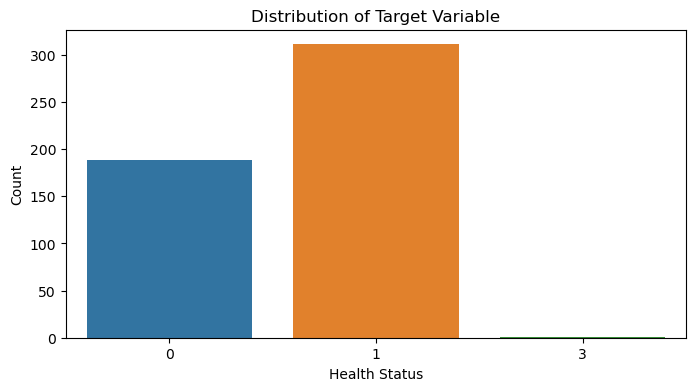

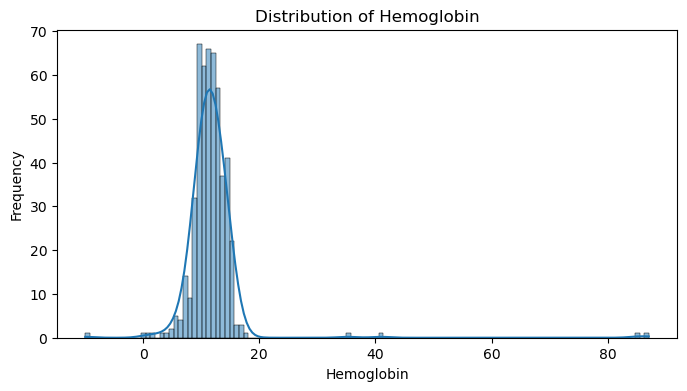

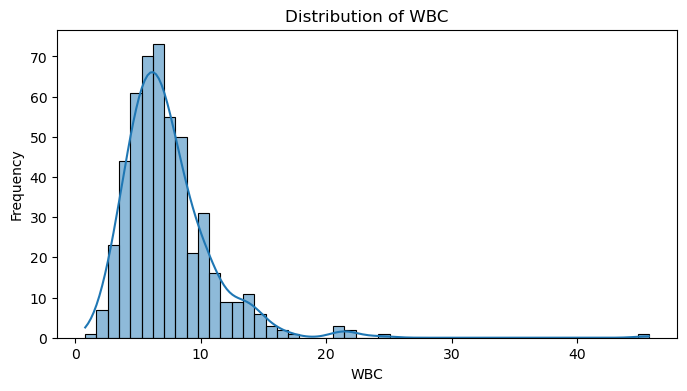

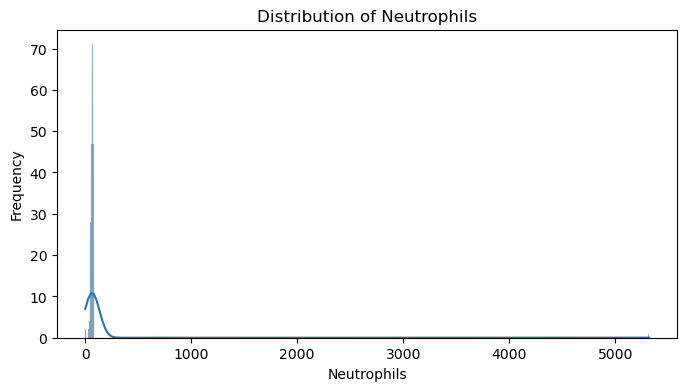

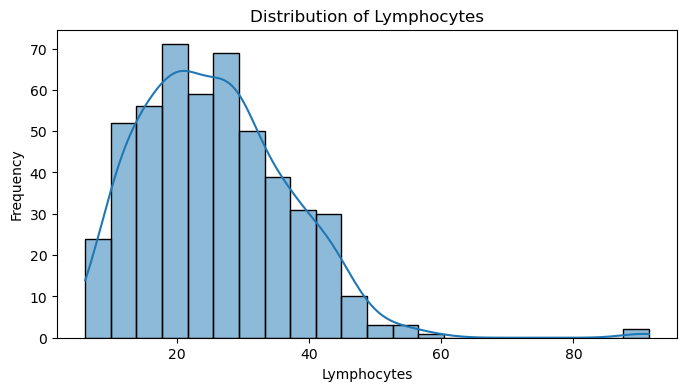

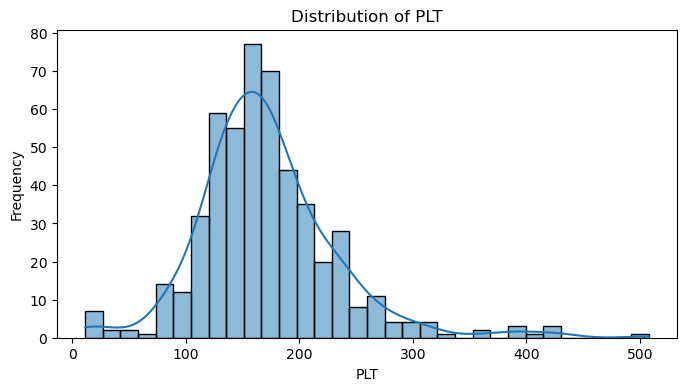

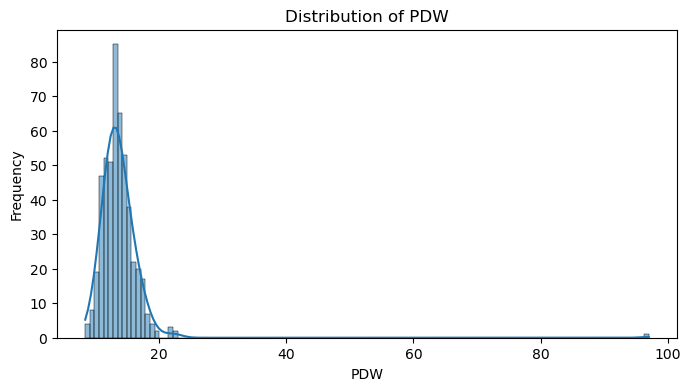

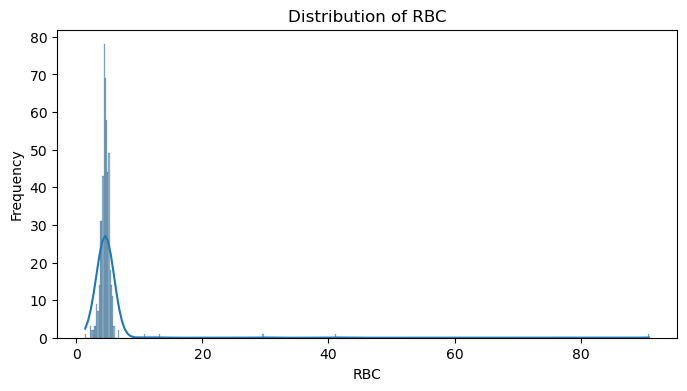

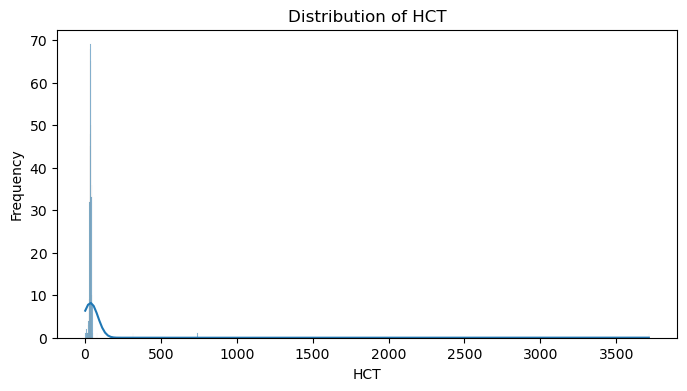

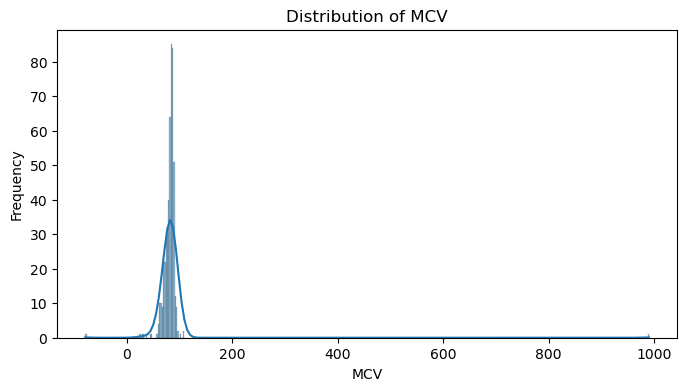

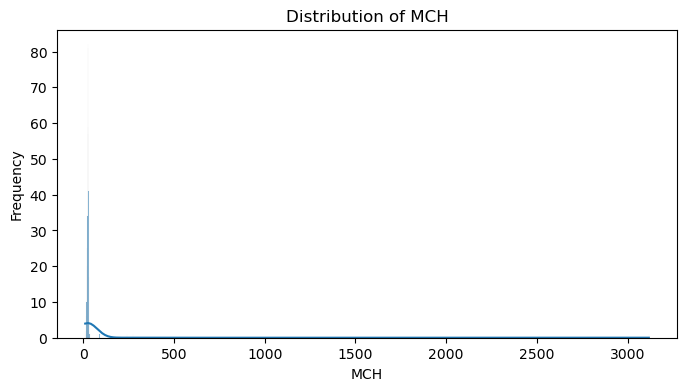

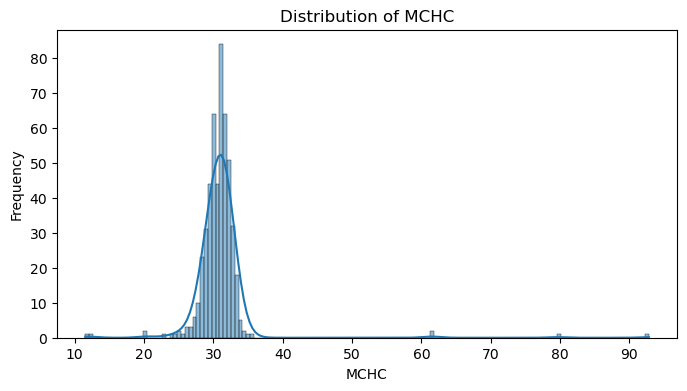

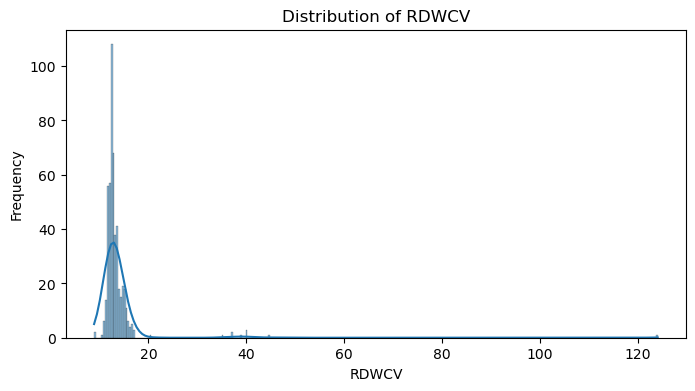

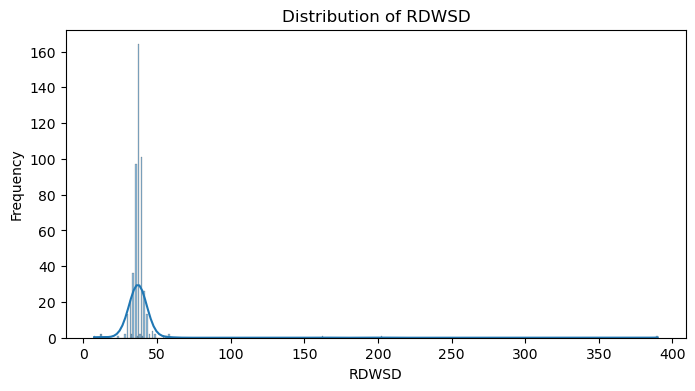

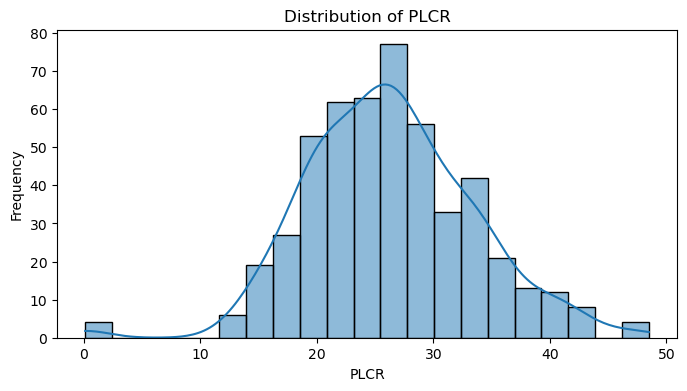

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

# Function to read all sheets from an Excel file
def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    dataframes = {}
    for sheet_name, df in all_sheets.items():
        # Strip whitespace from column names
        df = df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
        # Strip whitespace from cells
        df = df.progress_apply(lambda col: col.str.strip() if col.dtype == "object" else col)
        dataframes[sheet_name] = df
    return dataframes

# Load the data
dataframes = read_all_sheets_from_excel('Data Entry 1.xlsx')

# Assuming 'dataframes' is a dictionary containing all sheets, we use the first sheet
# as it's the only one mentioned so far
# Extract the first sheet dataframe
df = list(dataframes.values())[0]

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

# Plot distributions of a few features
features_to_plot = ['Hemoglobin', 'WBC', 'Neutrophils', 'Lymphocytes', 'PLT','PDW','RBC','HCT','MCV','MCH','MCHC','RDWCV','RDWSD','PLCR']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
data = data[data['Hemoglobin'] <= 20]


In [18]:
# Identify and remove outliers using the Interquartile Range (IQR) method

# Function to remove outliers based on the IQR method
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_filtered

# Apply the function to each feature
features_to_check = ['Hemoglobin', 'WBC', 'Neutrophils', 'Lymphocytes', 'PLT','PDW','RBC','HCT','MCV','MCH','MCHC','RDWCV','RDWSD','PLCR']
df_clean = df.copy()
for feature in features_to_check:
    df_clean = remove_outliers(df_clean, feature)

# Display the shape of the original and cleaned dataframes
print('Original dataframe shape:', df.shape)
print('Cleaned dataframe shape:', df_clean.shape)

Original dataframe shape: (500, 20)
Cleaned dataframe shape: (357, 20)


In [19]:
df_clean
data_t= df_clean

In [20]:
data_t= data_t.drop(columns=['PLT','WBC'])
data_t= data_t.drop("ID",axis=1)
data_t['PLT']= data_t['PLT T']
data_t=data_t.drop('PLT T',axis=1)
data_t['WBC']= data_t['WBC T']
data_t=data_t.drop('WBC T',axis=1)


In [21]:
data_t

Hemoglobin  Neutrophils  Lymphocytes   MPV   PCT   PDW   RBC   HCT   MCV  \
2           9.0         60.7         30.7  10.1  0.14  14.3  3.97  30.5  77.0   
7          12.0         64.0         27.4  10.2  0.19  15.9  4.39  37.9  86.4   
8          13.2         72.4         19.7   8.7  0.15  10.0  4.85  41.0  84.7   
9          12.4         79.0         12.4   8.6  0.14  11.3  4.57  38.9  85.3   
10         11.0         56.9         35.6   9.1  0.15  13.1  4.31  36.3  84.3   
..          ...          ...          ...   ...   ...   ...   ...   ...   ...   
490        11.8         57.4         34.4  10.0  0.27  14.6  4.24  36.2  85.6   
495        13.2         49.5         43.4  10.1  0.17  14.3  4.77  41.2  86.4   
496        11.6         57.6         35.0   9.9  0.18  13.6  4.82  37.0  76.7   
497         9.9         63.5         29.2   9.6  0.12  12.8  4.40  30.3  68.8   
499        10.3         75.4         15.5   9.7  0.23  13.8  4.27  31.0  72.0   

      MCH  MCHC  RDWCV  RDWSD   PLCR  Target     PLT      WBC  
2    22.6  29.5   13.7   37.2  30.50       0  148000   7200.0  
7    27.3  31.6   12.2   37.2  31.10       1  194000   9300.0  
8    27.2  32.1   11.8   35.3  15.90       1  181000   5200.0  
9    27.1  31.8   12.4   37.2  16.70       1  164000  10500.0  
10   25.5  30.3   13.2   38.0  21.80       1  171000   5600.0  
..    ...   ...    ...    ...    ...     ...     ...      ...  
490  27.8  32.5   12.3   37.2  28.50       0  272000   2900.0  
495  27.4  31.7   12.2   37.2  28.60       1  169000   2700.0  
496  24.0  31.4   13.8   37.2  29.00       1  177000   6200.0  
497  22.7  33.0   10.6   38.0  24.60       0  133100   8400.0  
499  24.4  33.5   12.3   40.7  26.14       1  244000  12900.0  

[357 rows x 17 columns]

In [22]:
X = data_t.drop('Target', axis=1)
y = data_t['Target']

In [23]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_t = scaler.fit_transform(X_train_t)
X_test_scaled_t = scaler.transform(X_test_t)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)

In [25]:
model.fit(X_train_scaled_t,y_train_t)

RandomForestClassifier()

In [26]:
y_pred = model.predict(X_test_scaled_t)
accuracy = accuracy_score(y_test_t, y_pred)
print("Random Forest =",accuracy)

Random Forest = 0.9722222222222222


In [27]:
# # Collect user input
# Hemoglobin = float(input('Enter Hemoglobin: '))
# Neutrophils = float(input('Enter Neutrophils: '))
# Lymphocytes = float(input('Enter Lymphocytes: '))
# MPV = float(input('Enter MPV: '))
# PCT = float(input('Enter PCT: '))
# PDW = float(input('Enter PDW: '))
# RBC = float(input('Enter RBC: '))
# HCT = float(input('Enter HCT: '))
# MCV = float(input('Enter MCV: '))
# MCH = float(input('Enter MCH: '))
# MCHC = float(input('Enter MCHC: '))
# RDWCV = float(input('Enter RDWCV: '))
# RDWSD = float(input('Enter RDWSD: '))
# PLCR = float(input('Enter PLCR: '))
# PLT = float(input('Enter PLT: '))
# WBC = float(input('Enter WBC: '))

# # Create a dictionary with user input
# data = {
#     'Hemoglobin': Hemoglobin,
#     'Neutrophils': Neutrophils,
#     'Lymphocytes': Lymphocytes,
#     'MPV': MPV,
#     'PCT': PCT,
#     'PDW': PDW,
#     'RBC': RBC,
#     'HCT': HCT,
#     'MCV': MCV,
#     'MCH': MCH,
#     'MCHC': MCHC,
#     'RDWCV': RDWCV,
#     'RDWSD': RDWSD,
#     'PLCR': PLCR,
#     'PLT': PLT,
#     'WBC': WBC
# }

# # Create a DataFrame from the user input
# dataframe = pd.DataFrame([data])

# # Use the same scaler that was fitted on the training data
# numerical_features_transformed = scaler.transform(dataframe)

# # Make predictions
# predict = model.predict(numerical_features_transformed)
# print(predict)


In [28]:
import pickle


In [29]:
pickle.dump(model,open('model.pkl','wb'))

In [30]:
pickle.dump(scaler,open('scaler.pkl','wb'))